In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from itertools import combinations


In [3]:
def create_iterator(file_path, batch_size):
    '''This creates an iterator object that can be used to read the file in chunks'''
    iterator = pd.read_csv(file_path, delimiter=';', decimal=',', chunksize=batch_size)
    return iterator

In [4]:
def summary_statistics(iterator):
    '''This function calculates the summary statistics for each batch'''
    for i, chunk in enumerate(iterator):
        print(f"\nBatch {i+1} - Column Types:")

        print(f"Batch {i+1} Summary Statistics:\n{chunk.describe()}")
        #print(f"Batch {i+1}:\n{chunk.head()}")

In [6]:
"""def visualize_values(iterator):
    for i, chunk in enumerate(iterator):
        print(f"\nBatch {i+1} - Column Values Visualization:")
        
        chunk = process_chunk(chunk)
        # Plot box plots for each column
        for column in chunk.columns:
            plt.figure(figsize=(10, 6))
            chunk.boxplot(column=[column])
            plt.title(f"Batch {i+1} - {column} Values")
            plt.show()"""


def visualize_values(iterator, col):
    for i, chunk in enumerate(iterator):
        print(f"\nBatch {i+1} - Column Values Visualization:")
                
        # Plot line charts for four columns side by side
    
        plt.figure(figsize=(15, 6))
        
        for idx, column in enumerate(col):
            plt.subplot(1, 4, idx + 1)
            plt.plot(chunk.index, chunk[column], label=column)
            plt.title(column)
            plt.xlabel('Time')
            plt.ylabel('Value')
            plt.legend()

        plt.show()

In [2]:
file_path = 'D:\Hiwi-TimeSeries\dataset\Versuch1_final.csv'
batch_size = 10000
columns = ['Geschw_X_glatt_zwanzig_0', 'Geschw_Y_glatt_zwanzig_0', 
'Geschw_Z_glatt_zwanzig_0',
'Geschw_SP_glatt_zwanzig_0',
'Beschl_X_glatt_zwanzig_0',
'Beschl_Y_glatt_zwanzig_0',
'Beschl_Z_glatt_zwanzig_0',
'Beschl_SP_glatt_zwanzig_0',
'Kraft_X_glatt_zwanzig_0',
'Kraft_Y_glatt_zwanzig_0',
'Kraft_Z_glatt_zwanzig_0',
'Kraft_SP_glatt_zwanzig_0',
'Current_X_glatt_zwanzig_abs',
'Current_Y_glatt_zwanzig_abs',
'Current_Z_glatt_zwanzig_abs',
'Current_SP_glatt_zwanzig_abs'
]

In [8]:
iterator = create_iterator(file_path, batch_size)
summary_statistics(iterator)


Batch 1 - Column Types:
Batch 1 Summary Statistics:
       Geschw_X_glatt_zwanzig_0  Geschw_Y_glatt_zwanzig_0  \
count              10000.000000              10000.000000   
mean                  89.577547                 86.670908   
std                 1052.115057               1185.861075   
min                 -281.465854                 -1.180976   
25%                 -174.089268                  0.000000   
50%                  139.916341                  0.000000   
75%                  202.945610                  0.000000   
max                18891.016829              21132.545854   

       Geschw_Z_glatt_zwanzig_0  Geschw_SP_glatt_zwanzig_0  \
count              1.000000e+04               10000.000000   
mean              -1.077528e+02                1173.560133   
std                1.661835e+03                 421.514912   
min               -3.000285e+04                  -0.069780   
25%               -1.353931e-18                 900.005248   
50%                0.0000

In [ ]:
visualize_values(iterator, columns[::4])

# Find Peaks

In [3]:
df = pd.read_csv(file_path, delimiter=';', decimal=',')

In [4]:
def get_peaks_all_columns(df, columns, p=1):
    peaks_info = {}

    for column in columns:
        # Perform peak detection using scipy's find_peaks
        peaks, _ = find_peaks(df[column], height=p*df[column].mean())  # Adjust 'height' parameter as needed

        # Store the peak indices in a dictionary
        peaks_info[column] = peaks

    return peaks_info

In [5]:
def plot_peaks(df, peaks_info, columns):
    ''' Plot the signals and mark the detected peaks '''

    for column, peaks in peaks_info.items():
        plt.plot(df.index, df[column], label=column)
        plt.plot(df.index[peaks], df[column][peaks], 'x', label=f'{column} Peaks')
        plt.legend()
        plt.title(f'{column} with Peaks')
        plt.xlabel('Time (Index)')
        plt.ylabel('Signal Value')
        plt.show()

### 2x Mean of each column is the peak

In [6]:
peaks_info = get_peaks_all_columns(df, columns, p=2)

#plot_peaks(df, peaks_info, columns[::4])


Two times the mean value of columns and the corresponding list of peaks in every column.

In [7]:
new_df = pd.DataFrame(index=df.columns)
mean_values = df.mean()
new_df['two_times_mean'] = 2 * mean_values
new_df['no_of_peaks'] = np.nan
new_df['peaks_index'] = np.nan
new_df['peak_values'] = np.nan
for column_name in new_df.index:
    if column_name in peaks_info.keys():
        new_df.at[column_name, 'no_of_peaks'] = len(peaks_info[column_name])
        new_df.at[column_name, 'peaks_index'] = str(peaks_info[column_name])
        peak_indices = peaks_info.get(column_name, [])  # Get peak indices for the current column
        peak_values = df.loc[peak_indices, column_name].tolist()  # Get peak values from df
        new_df.at[column_name, 'peak_values'] = str(peak_values)
        #new_df.at[column_name, 'peak_values'] = df.loc[str(peaks_info[column_name]), column_name]
print(new_df)

                              two_times_mean  no_of_peaks  \
Geschw_X_glatt_zwanzig_0        3.560097e+01      98613.0   
Geschw_Y_glatt_zwanzig_0        3.340613e+01      72233.0   
Geschw_Z_glatt_zwanzig_0       -4.708350e+01     449656.0   
Geschw_SP_glatt_zwanzig_0       4.229489e+03      62670.0   
Beschl_X_glatt_zwanzig_0       -3.055739e-10     447386.0   
Beschl_Y_glatt_zwanzig_0       -7.469585e-11     444634.0   
Beschl_Z_glatt_zwanzig_0        6.111478e-11     404086.0   
Beschl_SP_glatt_zwanzig_0       2.115935e-01      59148.0   
Kraft_X_glatt_zwanzig_0         0.000000e+00          0.0   
Kraft_Y_glatt_zwanzig_0         0.000000e+00          0.0   
Kraft_Z_glatt_zwanzig_0         0.000000e+00          0.0   
Kraft_SP_glatt_zwanzig_0        0.000000e+00          0.0   
removed_material_0              0.000000e+00          NaN   
Current_X_glatt_zwanzig_abs     9.986725e-01       1500.0   
Current_Y_glatt_zwanzig_abs     9.543202e-01       2263.0   
Current_Z_glatt_zwanzig_

In [8]:
def check_peak_occurence_pair(peaks_info, df):
    for i in range(4):
        selected_keys = list(peaks_info.keys())[i::4]
        pairs = list(combinations(selected_keys, 2))

        for pair in pairs:
            key1, key2 = pair
            common_peaks_between_columns = set(peaks_info[key1]) & set(peaks_info[key2])
            if common_peaks_between_columns:
                result_df = pd.DataFrame(index=list(pair))
                result_df['two_times_mean'] = new_df.loc[result_df.index, 'two_times_mean']
                result_df['no_of_peaks'] = len(common_peaks_between_columns)   
                result_df['peak_indices'] = str(list(common_peaks_between_columns))
                key1_peaks = df.loc[list(common_peaks_between_columns), key1].tolist()
                key2_peaks = df.loc[list(common_peaks_between_columns), key2].tolist()
                
                result_df['peak_values'] = [key1_peaks, key2_peaks]

                #result_df['peak_values'] = df.loc[list(common_peaks_between_columns), [key1, key2]].apply(lambda x: list(x), axis=1)
                #print(df.loc[list(common_peaks_between_columns), result_df.index].apply(list, axis=1))
                result_df.sort_index(inplace=True)
                print("Common Peaks Indices:\n", result_df.head(10))

In [33]:
check_peak_occurence_pair(peaks_info, df)

Common Peaks Indices:
                           two_times_mean  no_of_peaks  \
Beschl_X_glatt_zwanzig_0   -3.055739e-10        21476   
Geschw_X_glatt_zwanzig_0    3.560097e+01        21476   

                                                               peak_indices  \
Beschl_X_glatt_zwanzig_0  [1048576, 1310726, 1179656, 1310729, 1703951, ...   
Geschw_X_glatt_zwanzig_0  [1048576, 1310726, 1179656, 1310729, 1703951, ...   

                                                                peak_values  
Beschl_X_glatt_zwanzig_0  [0.0002804878055563, 0.0003475609768118, 0.000...  
Geschw_X_glatt_zwanzig_0  [154.10195121925116, 448.1451219513341, 140.11...  
Common Peaks Indices:
                              two_times_mean  no_of_peaks  \
Current_X_glatt_zwanzig_abs        0.998673           12   
Geschw_X_glatt_zwanzig_0          35.600975           12   

                                                                  peak_indices  \
Current_X_glatt_zwanzig_abs  [993859, 951811, 1

Plot pairwise common peaks

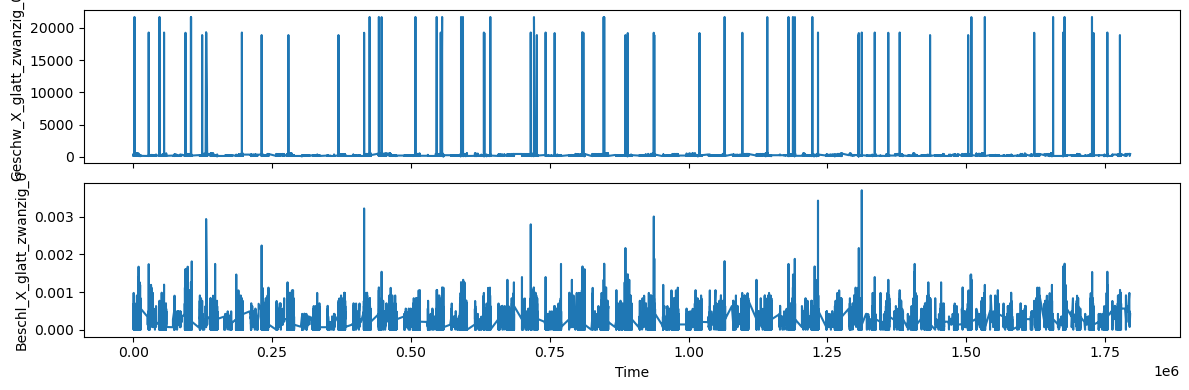

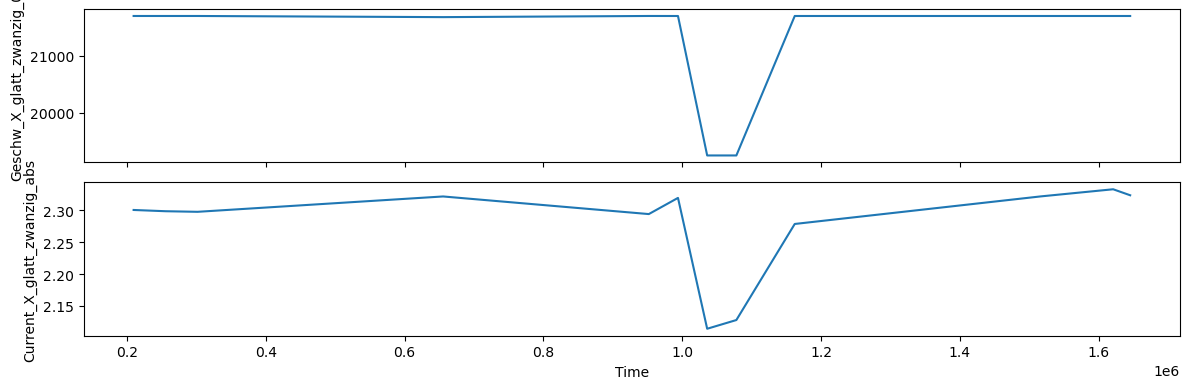

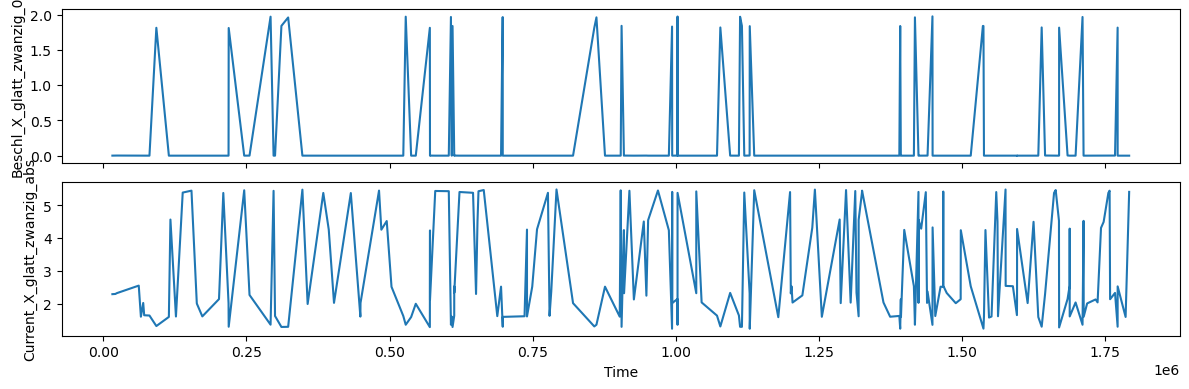

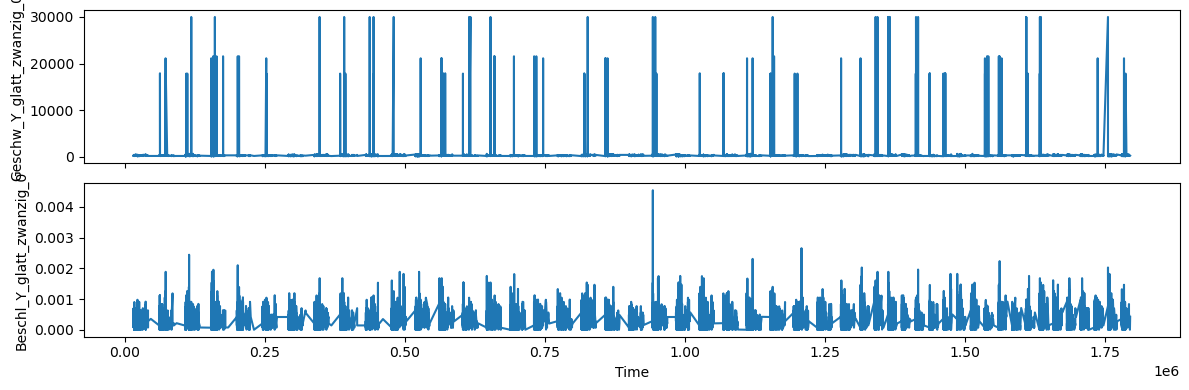

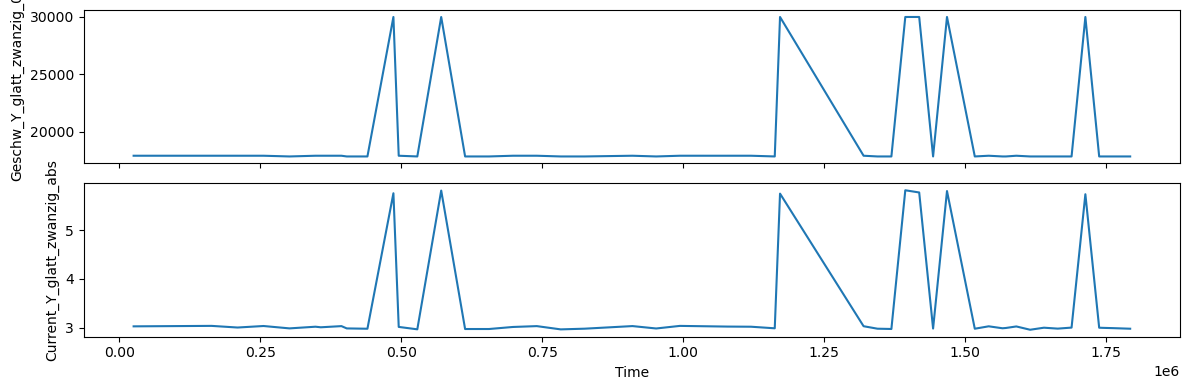

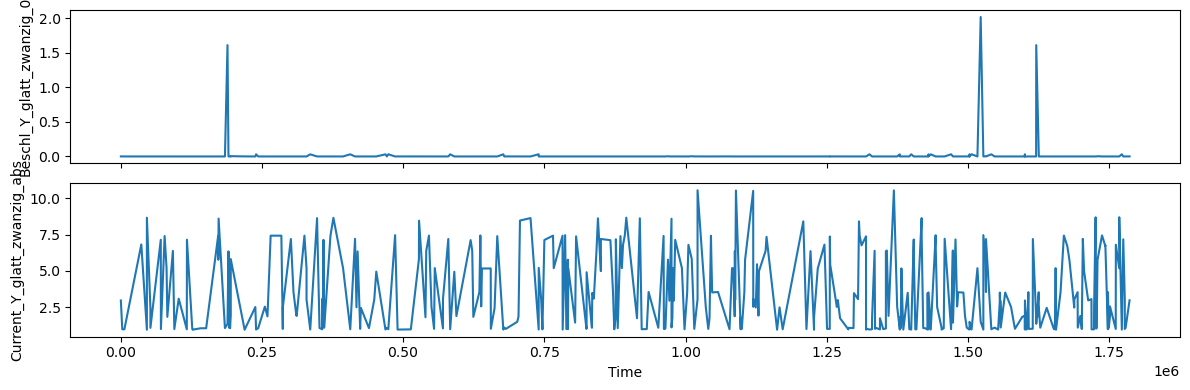

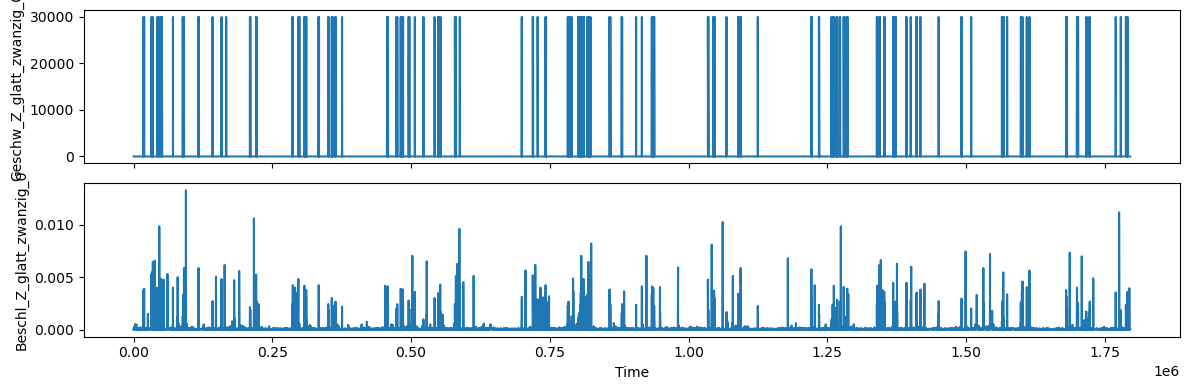

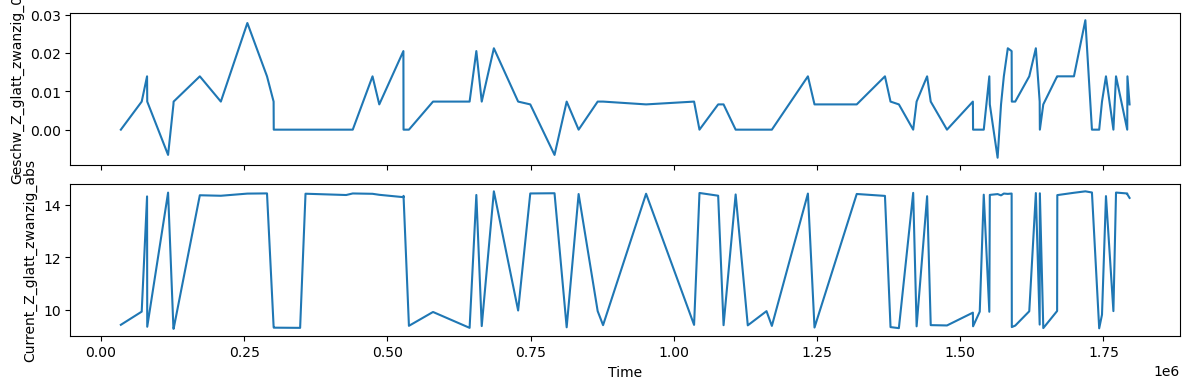

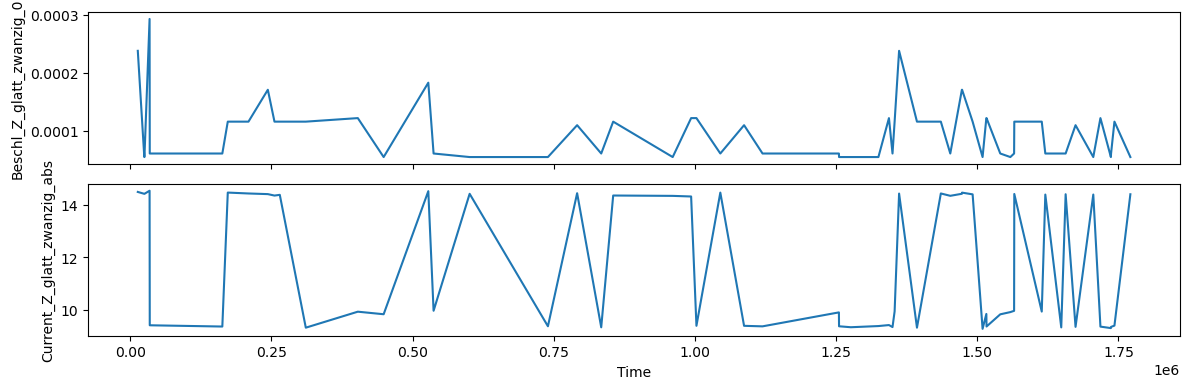

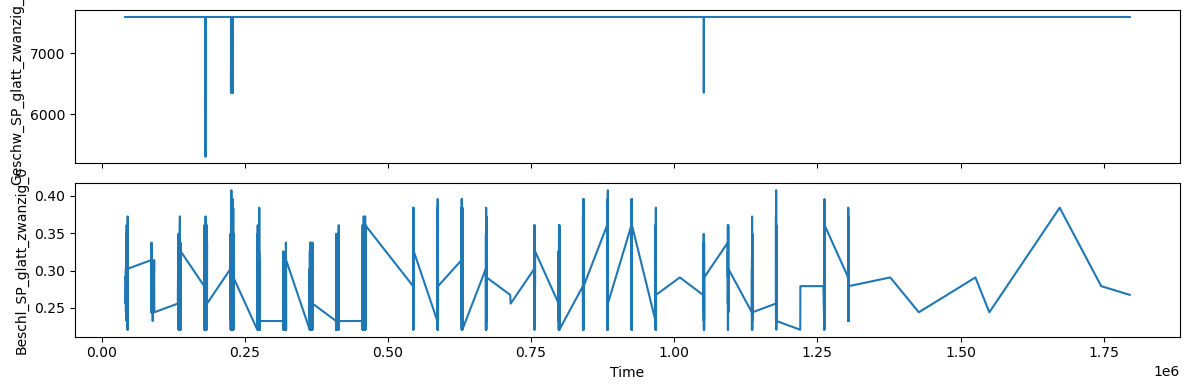

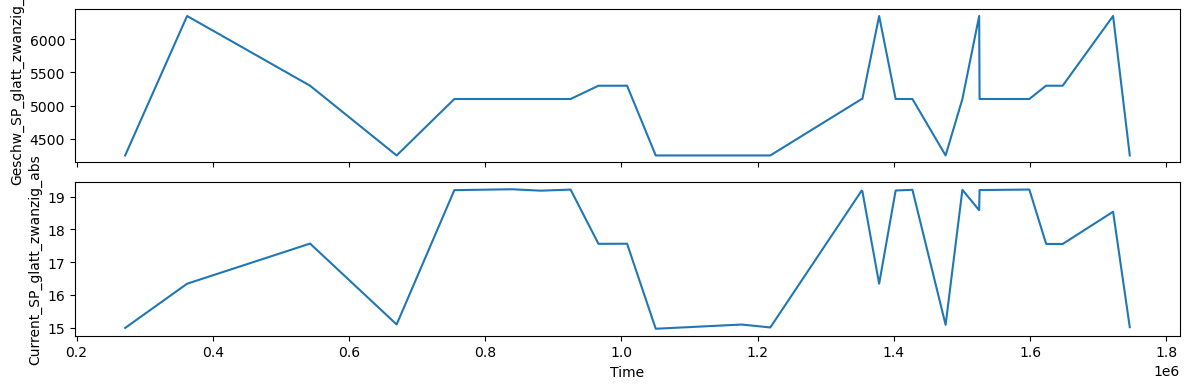

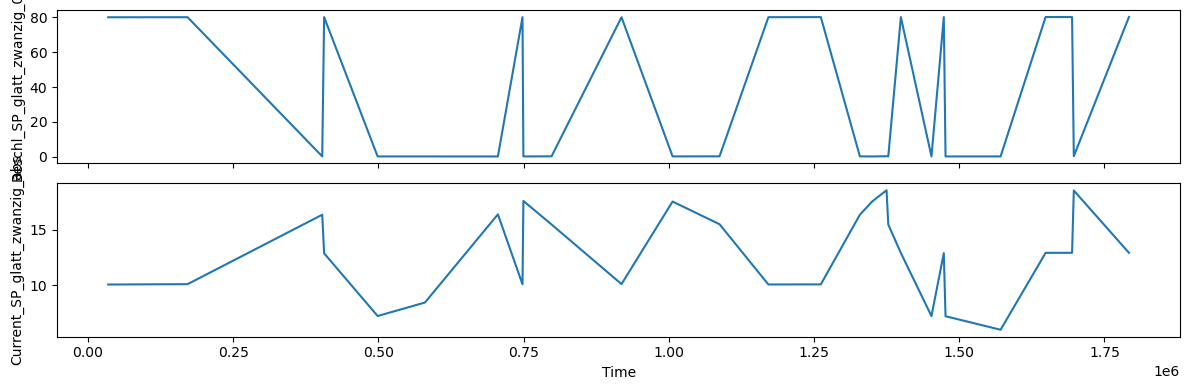

In [13]:
def plot_peak_occurence_pair(peaks_info, df):
    for i in range(4):
        selected_keys = list(peaks_info.keys())[i::4]
        pairs = list(combinations(selected_keys, 2))

        for pair in pairs:
            key1, key2 = pair
            common_peaks_between_columns = set(peaks_info[key1]) & set(peaks_info[key2])
            if common_peaks_between_columns:
                #print(common_peaks_between_columns,df.loc[list(common_peaks_between_columns), key1].tolist(),df.loc[list(common_peaks_between_columns), key2].tolist(), sep='\n')
                #print("\n")
                fig, ax = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
                ax[0].plot(sorted(list(common_peaks_between_columns)),df.loc[list(common_peaks_between_columns), key1].tolist(), label=key1)
                ax[1].plot(sorted(list(common_peaks_between_columns)),df.loc[list(common_peaks_between_columns), key2].tolist(), label=key2)
                ax[-1].set_xlabel('Time')
                ax[0].set_ylabel(key1)
                ax[1].set_ylabel(key2)
                plt.tight_layout()
                plt.show()

plot_peak_occurence_pair(peaks_info, df)

### 1x Mean is the peak

In [13]:
# Check if the detected peaks occur at the same time
def check_peak_occurence(peaks_info, df):
    for i in range(4):
        selected_keys = list(peaks_info.keys())[i::4]
        common_peaks = set.intersection(*(set(peaks_info[key]) for key in selected_keys))
        #print(f"Common Peaks for {selected_keys}: {common_peaks}")
        result_df = pd.DataFrame(index=list(common_peaks))
        for column in selected_keys:
            result_df[column] = df.loc[list(common_peaks), column]

        print("Common Peaks Indices:", result_df.head(10))

In [52]:
peaks_info = get_peaks_all_columns(df, columns, p=1)
check_peak_occurence(peaks_info, df)

Common Peaks Indices: Empty DataFrame
Columns: [Geschw_X_glatt_zwanzig_0, Beschl_X_glatt_zwanzig_0, Kraft_X_glatt_zwanzig_0, Current_X_glatt_zwanzig_abs]
Index: []
Common Peaks Indices: Empty DataFrame
Columns: [Geschw_Y_glatt_zwanzig_0, Beschl_Y_glatt_zwanzig_0, Kraft_Y_glatt_zwanzig_0, Current_Y_glatt_zwanzig_abs]
Index: []
Common Peaks Indices: Empty DataFrame
Columns: [Geschw_Z_glatt_zwanzig_0, Beschl_Z_glatt_zwanzig_0, Kraft_Z_glatt_zwanzig_0, Current_Z_glatt_zwanzig_abs]
Index: []
Common Peaks Indices: Empty DataFrame
Columns: [Geschw_SP_glatt_zwanzig_0, Beschl_SP_glatt_zwanzig_0, Kraft_SP_glatt_zwanzig_0, Current_SP_glatt_zwanzig_abs]
Index: []


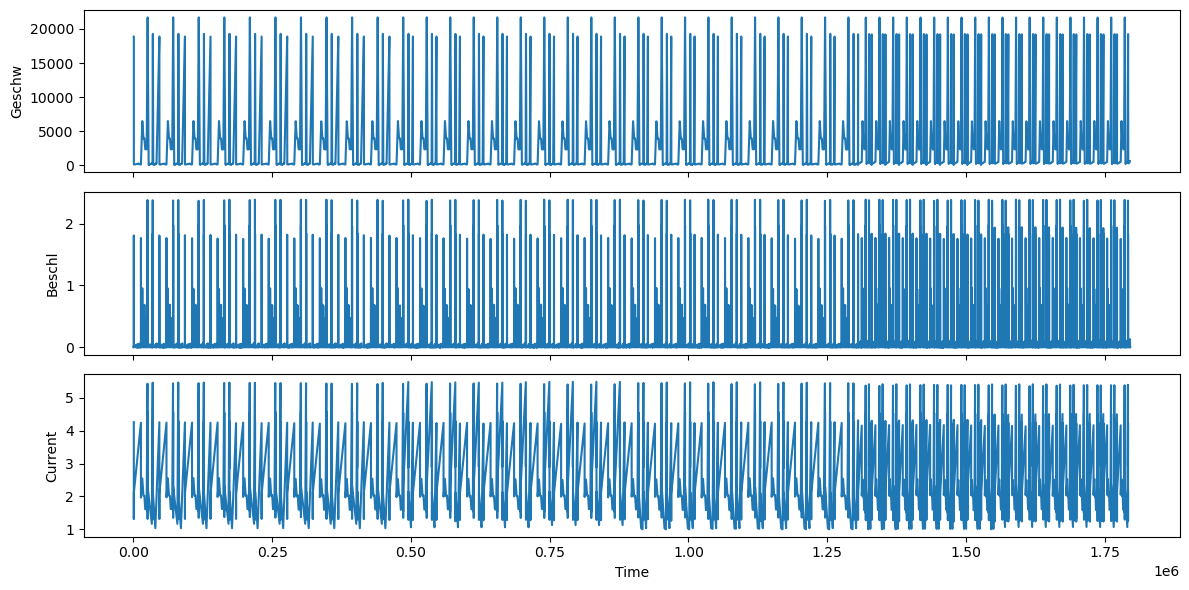

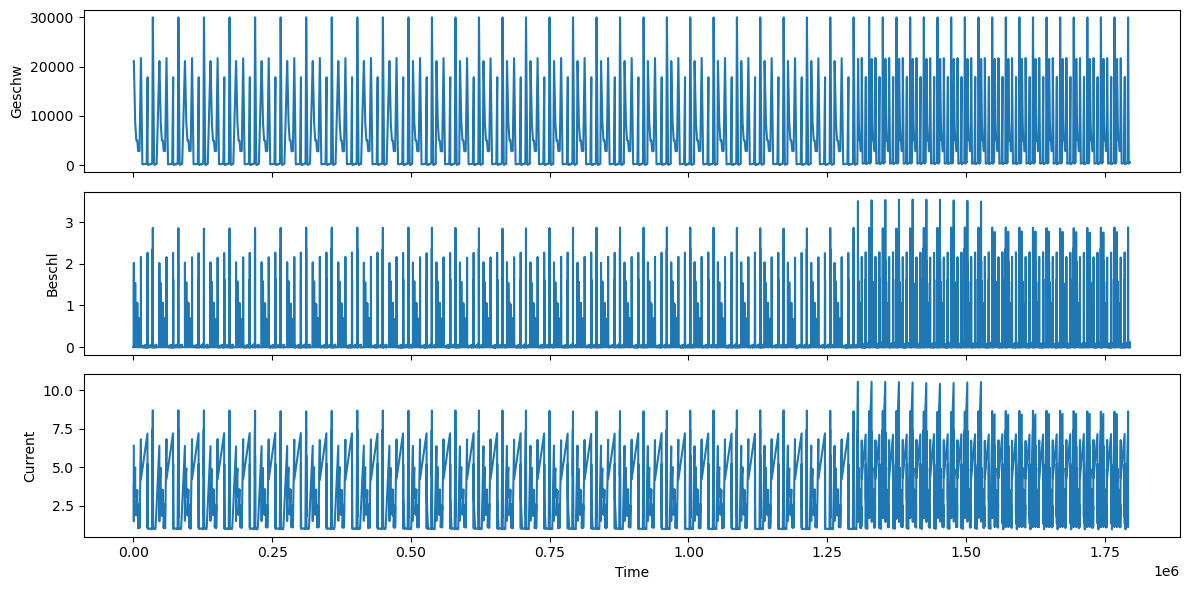

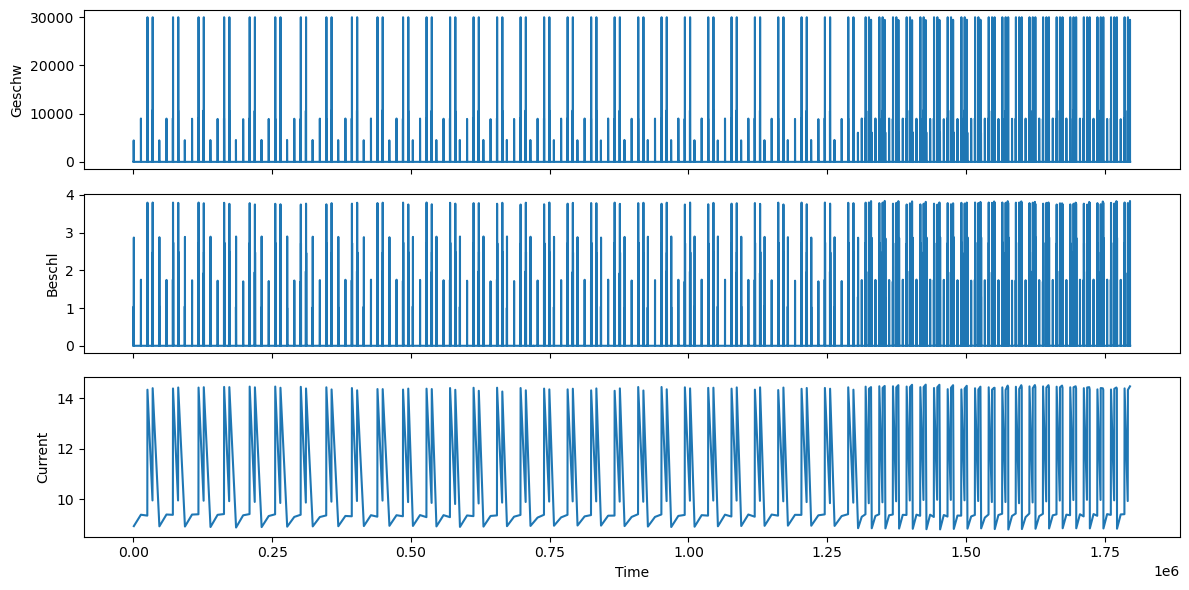

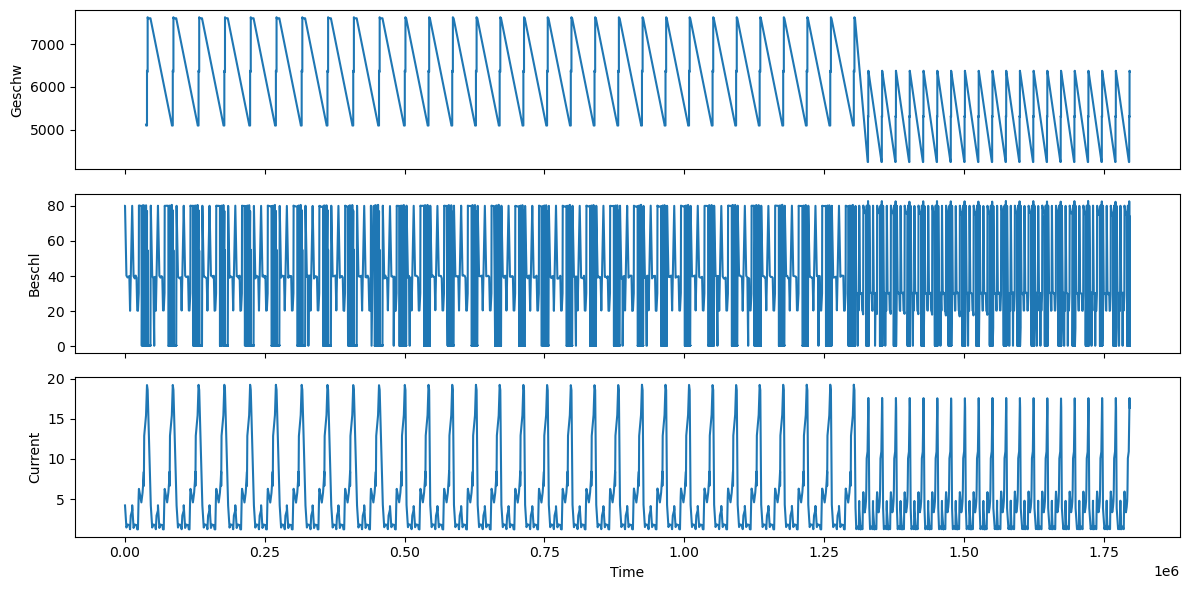

In [48]:
  # General peaks

for i in range(4):
    selected_keys = list(peaks_info.keys())[i::4]
    peaks_signal1 = peaks_info[selected_keys[0]]  # List of peak values for signal1
    peaks_signal2 = peaks_info[selected_keys[1]] 
    peaks_signal3 = peaks_info[selected_keys[3]] 
    #print(peaks_signal1)
    # Plotting the peaks
    fig, ax = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
    ax[0].plot(peaks_signal1,df.loc[list(peaks_signal1), selected_keys[0]].tolist(), label='Geschw')
    ax[1].plot(peaks_signal2,df.loc[list(peaks_signal2), selected_keys[1]].tolist(), label='Beschl')
    ax[2].plot(peaks_signal3,df.loc[list(peaks_signal3), selected_keys[3]].tolist(), label='Current')
    ax[0].set_ylabel('Geschw')
    ax[1].set_ylabel('Beschl')
    ax[2].set_ylabel('Current')
    ax[-1].set_xlabel('Time')

    # Add legend to the last subplot
    #ax[-1].legend()

    plt.tight_layout()
    plt.show()